## Spotify Song Attributes EDA
- Import dataset
- EDA to visualise data and observe structure
- Train a classifier (Decision Tree)
- Pull the results and test accuracy


In [1]:
#pip install graphviz

In [2]:
#pip install pydotplus

Here we are importing all the needed assets in order to create our decision tree model.

Please follow provided screen shots at the end of the code with directions to install graphviz as this requires an envrionment variable to be added to a windows path.

In [3]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier


from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc
import imageio
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
df = pd.read_csv('data.csv')

# Initial Data Read and View
Here will pull our initial database. These provides our categorical columns of each song and how it is rated on its categorical scale. 

In [5]:
df.describe()

,Unnamed: 0,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,speechiness,duration_ms,time_signature,valence.1,num_bars,num_sections,num_segments,target
count,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3.848000e+03,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000
mean,1044.433212,0.547150,0.604742,5.186331,-9.276017,0.673597,0.316063,0.180233,0.196261,0.503928,120.152102,0.064521,2.462736e+05,3.929574,0.503928,123.726871,10.705042,878.907744,0.476871
std,624.333268,0.154609,0.260959,3.586700,5.057344,0.468958,0.340209,0.306580,0.165377,0.240459,28.746002,0.083672,9.804036e+04,0.330384,0.240459,59.203451,4.032240,399.455832,0.499530
min,0.000000,0.061900,0.007560,0.000000,-33.241000,0.000000,0.000001,0.000000,0.018500,0.031600,34.749000,0.022200,2.817300e+04,1.000000,0.031600,9.000000,2.000000,86.000000,0.000000
25%,496.000000,0.445000,0.412000,2.000000,-11.645500,0.000000,0.010300,0.000004,0.099100,0.314000,98.853500,0.033500,1.867450e+05,4.000000,0.314000,86.000000,8.000000,636.000000,0.000000
50%,1022.500000,0.552000,0.647000,5.000000,-8.006000,1.000000,0.163000,0.001585,0.128000,0.500000,118.848000,0.041800,2.280000e+05,4.000000,0.500000,113.000000,10.000000,798.500000,0.000000
75%,1595.000000,0.653250,0.825250,8.000000,-5.635000,1.000000,0.610250,0.214500,0.248250,0.692000,138.232750,0.061800,2.817830e+05,4.000000,0.692000,147.000000,12.000000,1017.000000,1.000000
max,2125.000000,0.960000,0.998000,11.000000,1.342000,1.000000,0.995000,0.981000,0.992000,0.989000,209.942000,0.959000,1.613827e+06,5.000000,0.989000,894.000000,62.000000,5408.000000,1.000000


In [6]:
df.head()

,Unnamed: 0,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,...,valence,tempo,speechiness,duration_ms,time_signature,valence.1,num_bars,num_sections,num_segments,target
0,0,6Tt1P5CLUrl59oSOTVxON0,Joy,Bastille,['Bastille'],0.555,0.923,6,-4.748,0,...,0.363,118.007,0.1610,192681,4,0.363,92,8,654,1
1,1,2dpaYNEQHiRxtZbfNsse99,Happier,Marshmello,"['Marshmello', 'Bastille']",0.687,0.792,5,-2.749,1,...,0.671,100.015,0.0452,214290,4,0.671,88,9,789,1
2,2,6fNhZRFEkBfgW39W3wKARJ,Pompeii,Bastille,['Bastille'],0.679,0.715,9,-6.383,1,...,0.571,127.435,0.0407,214148,4,0.571,113,11,761,1
3,3,1lwvJQGhdq6Kyr4BBquf23,survivin',Bastille,['Bastille'],0.787,0.780,7,-5.023,1,...,0.680,95.035,0.1290,173206,4,0.680,68,8,752,1
4,4,2Fn4gZI3MAeWTiv7cSVxZQ,Another Place,Bastille,"['Bastille', 'Alessia Cara']",0.685,0.742,8,-5.409,1,...,0.618,115.008,0.0471,213511,4,0.618,100,10,745,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3848 entries, 0 to 3847
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3848 non-null   int64  
 1   id                3848 non-null   object 
 2   title             3848 non-null   object 
 3   first_artist      3848 non-null   object 
 4   all_artists       3848 non-null   object 
 5   danceability      3848 non-null   float64
 6   energy            3848 non-null   float64
 7   key               3848 non-null   int64  
 8   loudness          3848 non-null   float64
 9   mode              3848 non-null   int64  
 10  acousticness      3848 non-null   float64
 11  instrumentalness  3848 non-null   float64
 12  liveness          3848 non-null   float64
 13  valence           3848 non-null   float64
 14  tempo             3848 non-null   float64
 15  speechiness       3848 non-null   float64
 16  duration_ms       3848 non-null   int64  


# Test Variables and initial Visualisations
This section we aim to build our training and test datasets. We also set the split percentage
Code below we are initialising the initial train and test variables. We first decided on a 30% split on the data

In [8]:
train, test = train_test_split(df, test_size = 0.30)

In [9]:
print('Training size: {}; Test size: {}'.format(len(train), len(test)))

Training size: 3270; Test size: 578


In [10]:
train.shape

(3270, 23)

Setting the colour palette of the initial visualisation of our attribute and future attributes 

In [11]:
# custom colour palette
red_blue = ['#19B5FE', '#EF4836']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style('white')

### Set the positive/negative values based on the 'target' column value being 1(like) or 0(dislike), for each chosen attribute.

In [12]:
pos_tempo = df[df['target']==1]['tempo']  #positive tempo variable
neg_tempo = df[df['target']==0]['tempo']  #negative tempo variable

pos_danceability = df[df['target']==1]['danceability']  #positive danceability variable
neg_danceability = df[df['target']==0]['danceability']  #negative danceability variable

pos_duration_ms = df[df['target']==1]['duration_ms']  #positive duration_ms variable
neg_duration_ms = df[df['target']==0]['duration_ms']  #negative duration_ms variable

pos_loudness = df[df['target']==1]['loudness']  #positive loudness variable
neg_loudness = df[df['target']==0]['loudness']  #negative loudness variable

pos_speechiness = df[df['target']==1]['speechiness']  #positive speechiness variable
neg_speechiness = df[df['target']==0]['speechiness']  #negative speechiness variable

pos_valence = df[df['target']==1]['valence']  #positive valence variable
neg_valence = df[df['target']==0]['valence']  #negative valence variable

pos_energy = df[df['target']==1]['energy']  #positive energy variable
neg_energy = df[df['target']==0]['energy']  #negative energy variable

pos_acousticness = df[df['target']==1]['acousticness']  #positive acousticness variable
neg_acousticness = df[df['target']==0]['acousticness']  #negative acousticness variable

pos_key = df[df['target']==1]['key']  #positive key variable
neg_key = df[df['target']==0]['key']  #negative key variable

pos_instrumentalness = df[df['target']==1]['instrumentalness']  #positive instrumentalness variable
neg_instrumentalness = df[df['target']==0]['instrumentalness']  #negative instrumentalness variable


Here we plot the distribution of likes and dislikes of our first attribute "Song Tempo" 

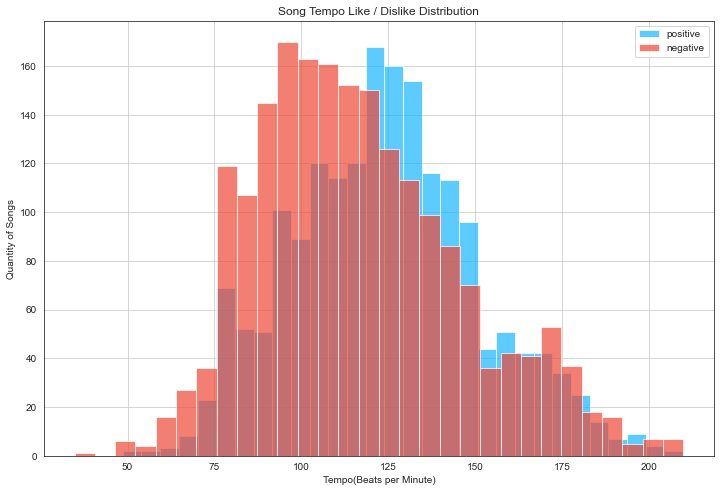

In [13]:
fig = plt.figure(figsize=(12, 8))
plt.title('Song Tempo Like / Dislike Distribution')
plt.xlabel("Tempo(Beats per Minute)")
plt.ylabel("Quantity of Songs")
pos_tempo.hist(alpha=0.7, bins= 30, label='positive')
neg_tempo.hist(alpha=0.7, bins= 30, label='negative')
plt.legend(loc = 'upper right')

Here we are simply recreating the above plot to show similar results for several attributes.

<ipython-input-14-1b5796e7d377>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = fig2.add_subplot(331)
No handles with labels found to put in legend.
<ipython-input-14-1b5796e7d377>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax6 = fig2.add_subplot(332)
<ipython-input-14-1b5796e7d377>:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  I

<AxesSubplot:title={'center':'Song Instrumentalness Like distribution'}, xlabel='Instrumentalness', ylabel='Count'>

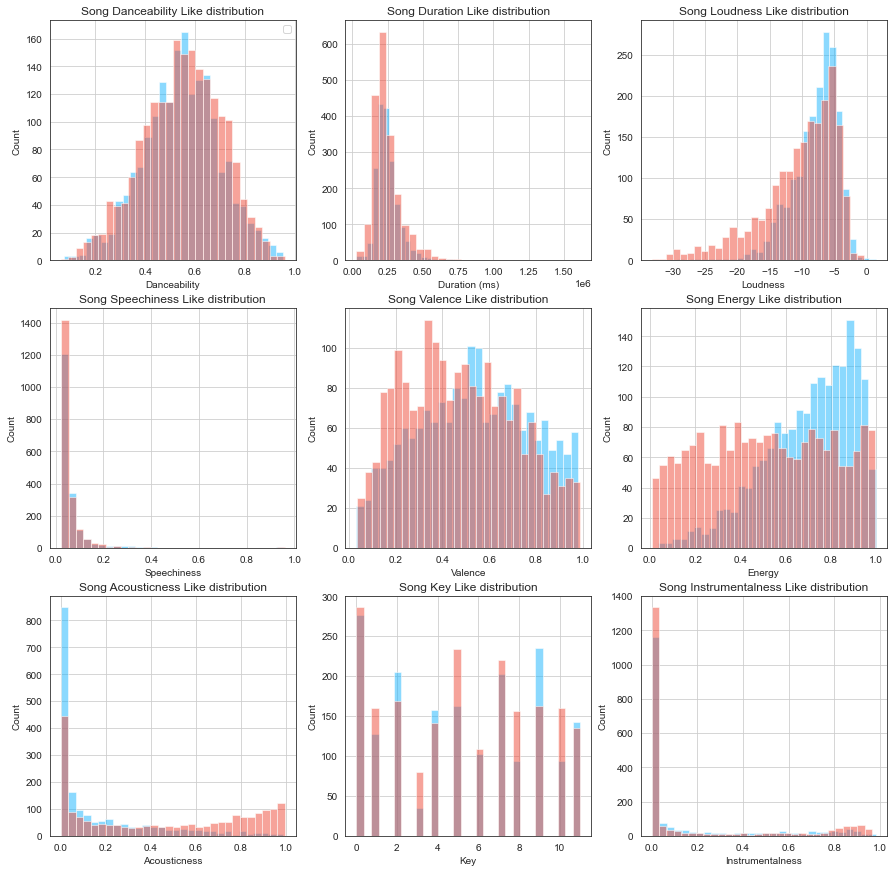

In [14]:
fig2= plt.figure(figsize=(15,15))

#Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like distribution')
pos_danceability.hist(alpha =0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_danceability.hist(alpha=0.5, bins=30)
plt.legend(loc = 'upper right')

#Duration
ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Duration (ms)')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration Like distribution')
pos_duration_ms.hist(alpha =0.5, bins=30)
ax6 = fig2.add_subplot(332)
neg_duration_ms.hist(alpha=0.5, bins=30)

#loudness
ax7 = fig2.add_subplot(333)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness Like distribution')
pos_loudness.hist(alpha =0.5, bins=30)
ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30)

#Speechiness
ax8 = fig2.add_subplot(334)
ax8.set_xlabel('Speechiness')
ax8.set_ylabel('Count')
ax8.set_title('Song Speechiness Like distribution')
pos_speechiness.hist(alpha =0.5, bins=30)
ax9 = fig2.add_subplot(334)
neg_speechiness.hist(alpha=0.5, bins=30)

#Valence
ax10 = fig2.add_subplot(335)
ax10.set_xlabel('Valence')
ax10.set_ylabel('Count')
ax10.set_title('Song Valence Like distribution')
pos_valence.hist(alpha =0.5, bins=30)
ax11 = fig2.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30)

#Energy
ax12 = fig2.add_subplot(336)
ax12.set_xlabel('Energy')
ax12.set_ylabel('Count')
ax12.set_title('Song Energy Like distribution')
pos_energy.hist(alpha =0.5, bins=30)
ax13 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)


#Acousticness
ax14 = fig2.add_subplot(337)
ax14.set_xlabel('Acousticness')
ax14.set_ylabel('Count')
ax14.set_title('Song Acousticness Like distribution')
pos_acousticness.hist(alpha =0.5, bins=30)
ax15 = fig2.add_subplot(337)
neg_acousticness.hist(alpha=0.5, bins=30)

#Key
ax16 = fig2.add_subplot(338)
ax16.set_xlabel('Key')
ax16.set_ylabel('Count')
ax16.set_title('Song Key Like distribution')
pos_key.hist(alpha =0.5, bins=30)
ax17 = fig2.add_subplot(338)
neg_key.hist(alpha=0.5, bins=30)


#Instrumentalness
ax18 = fig2.add_subplot(339)
ax18.set_xlabel('Instrumentalness')
ax18.set_ylabel('Count')
ax18.set_title('Song Instrumentalness Like distribution')
pos_instrumentalness.hist(alpha =0.5, bins=30)
ax19 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)


# Decision Tree Result and Accuracy 
Decision tree with 100 minimum obersations either side, to avoid overfitting. We then insert our test and train variables into the decision tree model which gives us our result. When then run an accuracy test to log how our chosen split has worked

In [15]:
c = DecisionTreeClassifier(min_samples_split=100)

Here we are selecting our attributes to use in our model. Well pool all of these into the features variable we will then create our X and Y training variables. We set X to the features and Y to the target column. We also duplicated this for X and Y test variables. Our goal is to use 303 test samples. 

In [16]:
features = ['danceability', 'duration_ms', 'loudness', 'speechiness', 'valence', 'energy', 'acousticness', 'key', 'instrumentalness']

In [17]:
X_train = train[features]
y_train = train['target']

X_test = test[features]
y_test = test['target']

In [18]:
y_test

1727    1
3315    0
2681    0
3541    0
106     1
       ..
2607    0
1981    0
3556    0
794     1
329     1
Name: target, Length: 578, dtype: int64

In [19]:
X_test

,danceability,duration_ms,loudness,speechiness,valence,energy,acousticness,key,instrumentalness
1727,0.557,175461,-6.722,0.0573,0.848,0.950,0.035600,3,0.000697
3315,0.408,225732,-3.082,0.1410,0.337,0.920,0.001970,2,0.001060
2681,0.699,177240,-9.956,0.0314,0.419,0.294,0.824000,5,0.000050
3541,0.555,239949,-7.289,0.0666,0.389,0.523,0.513000,0,0.000000
106,0.348,460000,-9.553,0.0388,0.141,0.432,0.819000,8,0.085600
...,...,...,...,...,...,...,...,...,...
2607,0.791,264093,-8.145,0.0371,0.967,0.756,0.214000,10,0.070400
1981,0.713,271867,-11.633,0.0677,0.713,0.513,0.509000,7,0.061800
3556,0.813,179293,-7.667,0.0684,0.587,0.456,0.169000,1,0.000003
794,0.439,189347,-5.049,0.0351,0.510,0.816,0.000648,0,0.486000


Creating our decision tree database joining x and y train variables

In [20]:
dt = c.fit(X_train, y_train)

In [21]:
dt

DecisionTreeClassifier(min_samples_split=100)

Using the authors example on decision trees we created the below code to visualise the models decision tree in action. First comment is the size of the figure. But this is a good high level view of our decision model.

In [22]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
   # img = misc.imread(path)  # imread is no longer available in scipy, using imageio instead
    img = imageio.imread(path)
    plt.rcParams['figure.figsize'] = (20, 20)
    plt.imshow(img)

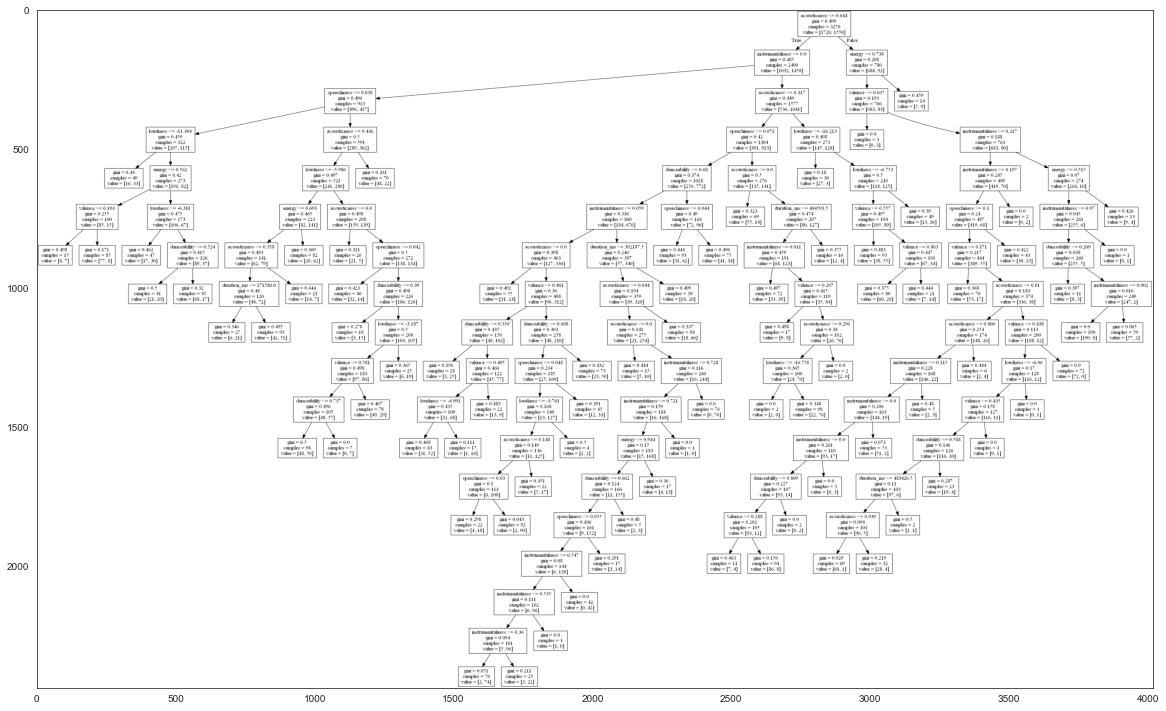

In [23]:
show_tree(dt, features, 'dec_tree_01.png')

In [24]:
y_pred = c.predict(X_test)

In [25]:
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,

Here we import our accuracy score test which pulls a 66.6% accuracy score from our test group.

In [26]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred) * 100

In [27]:
print('Accuracy using Desicion Tree: ', round(score, 1), '%')

Accuracy using Desicion Tree:  66.6 %


An optional code to test the accuracy of the decision tree model. 

In [28]:
#another way of showing the decision tree accuracy
dt.score(X_test,y_test)

0.6660899653979239

### graphviz requires a environment variable to be added in windows path, as below:
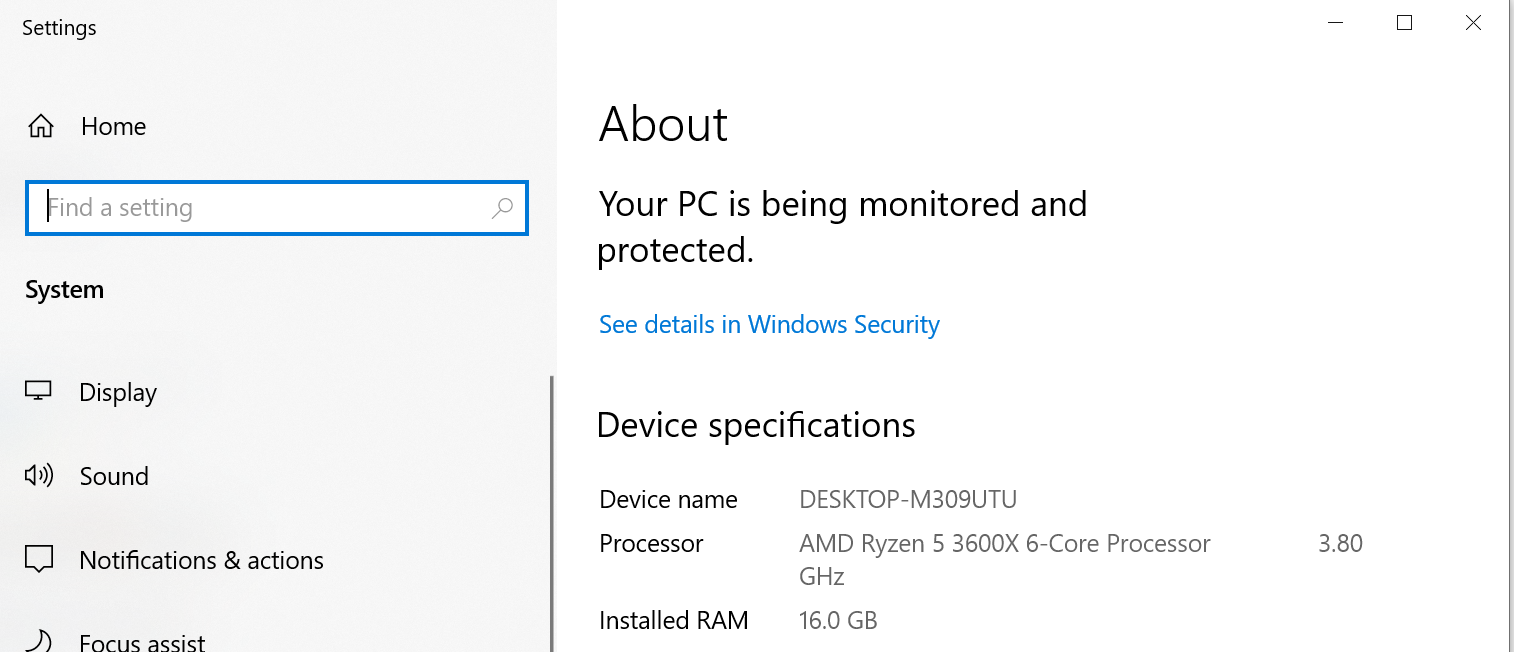
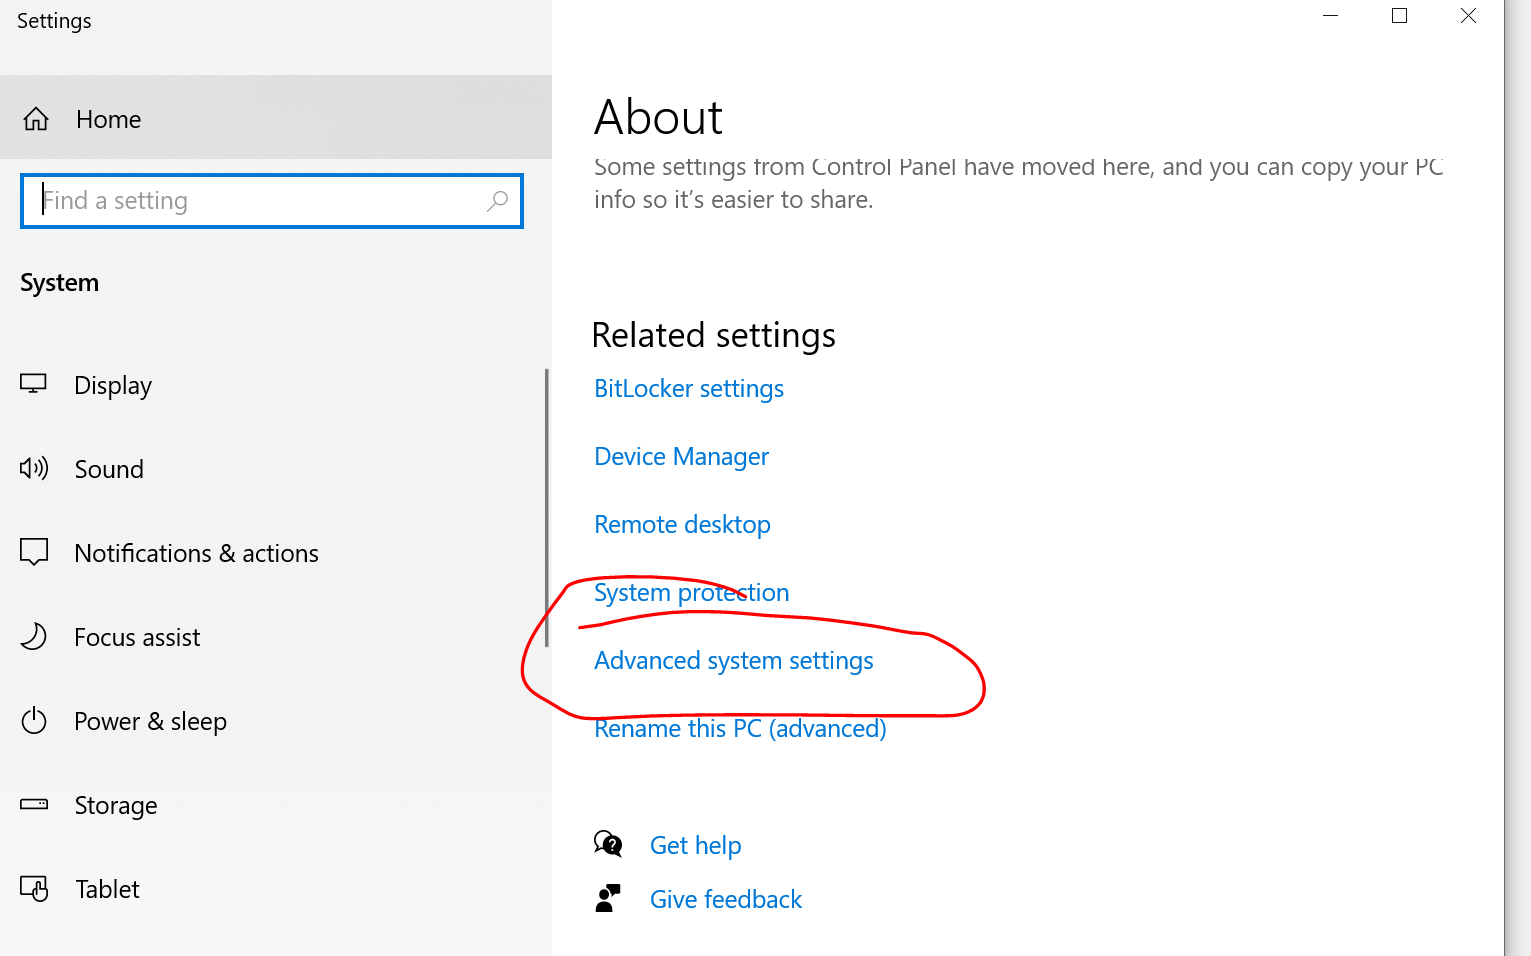
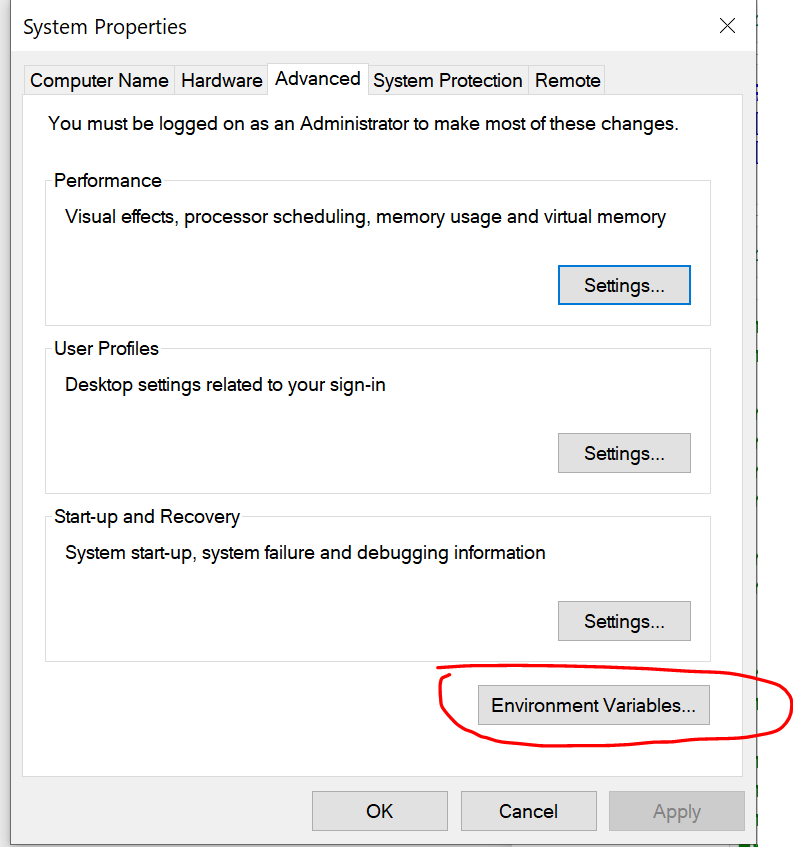
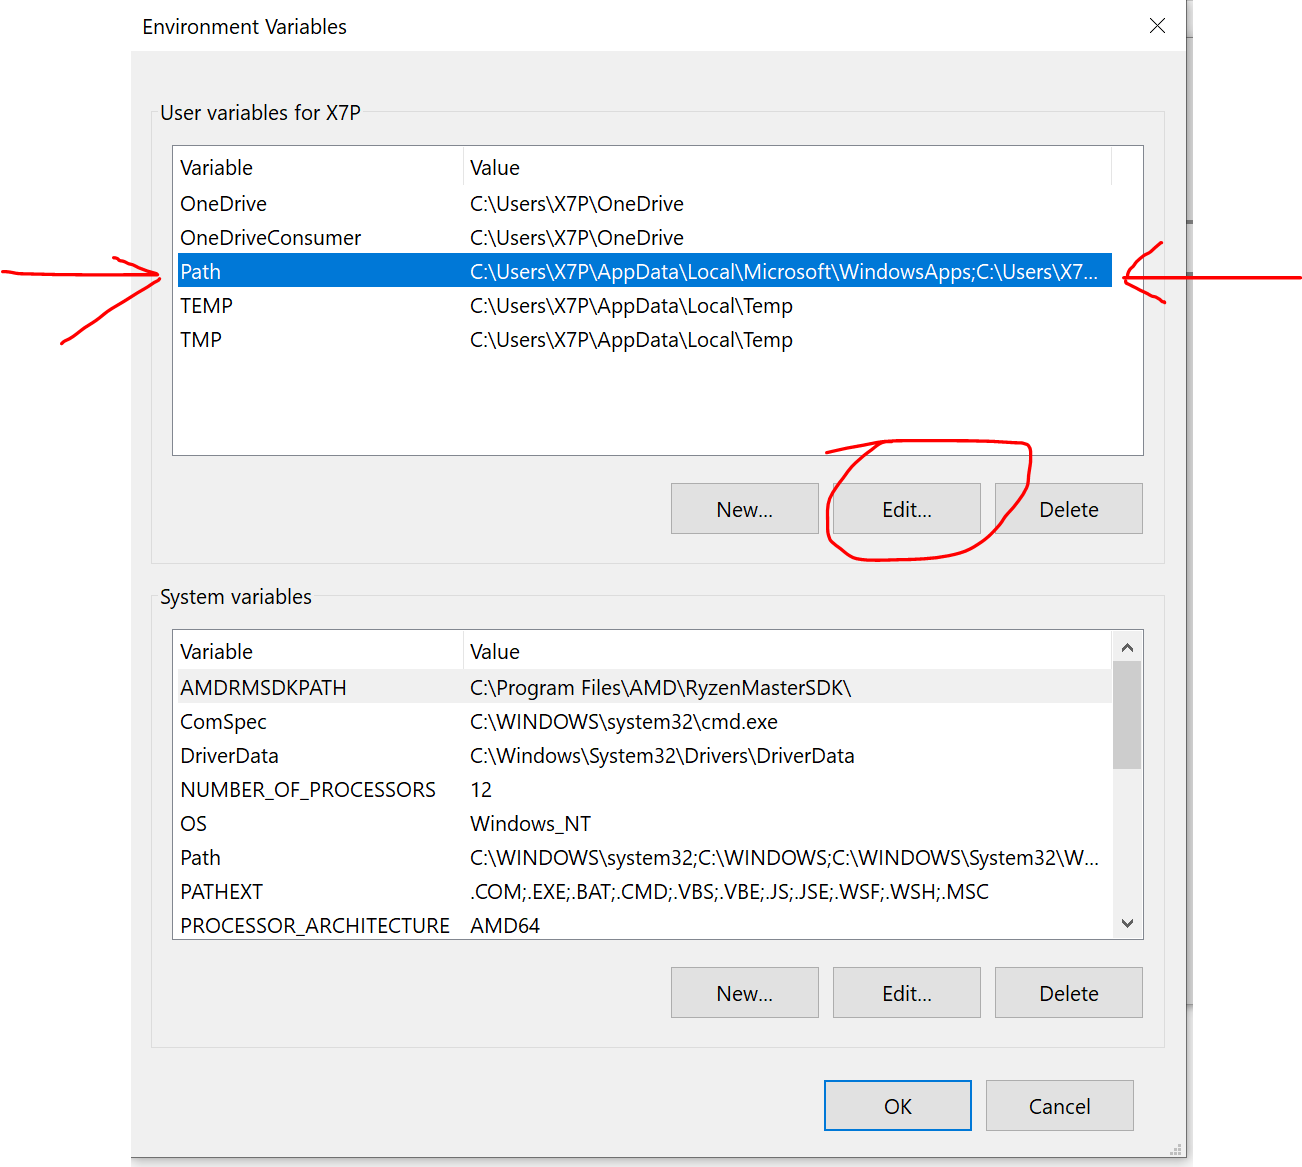
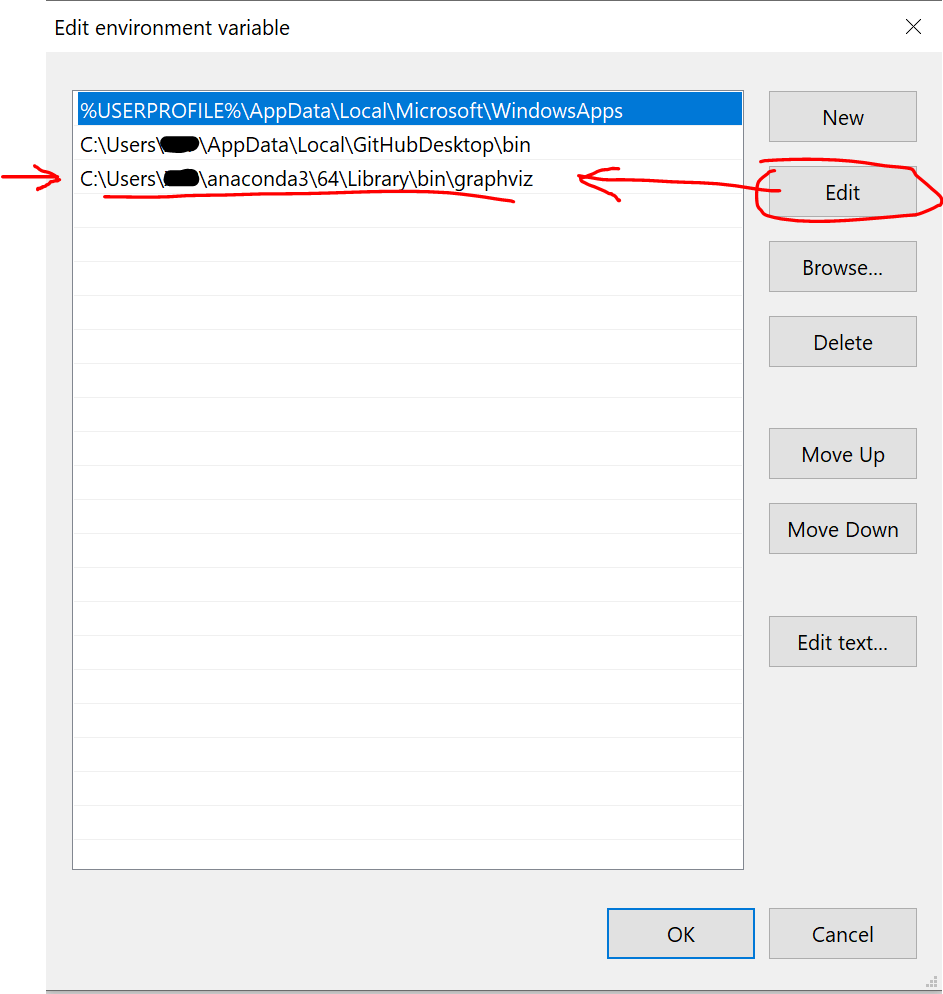